In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

testdf = pd.read_csv("test.csv") 
traindf = pd.read_csv("train.csv") 


### g_ssr : 血壓坐姿右手收縮壓，g_dsr : 血壓坐姿右手舒張壓，mdrug07 : 長期服用藥物高血脂藥物，
### psick10 : 您曾患下列疾病嗎?糖尿病，psick12 : 您曾患下列疾病嗎?心臟血管疾病，pisck11 : 有無中風

In [2]:
testdf.tail()
#長期服用藥物高血脂藥物

,pid,yr,age,g_ssr,g_dsr,mdrug07,psick10,psick12,psick11
14266,a19k419445,1997,56.0,149.0,82.0,0.0,0.0,0.0,0.0
14267,a19k419445,1999,58.0,140.0,100.0,0.0,0.0,0.0,0.0
14268,a19k419445,2000,59.0,150.0,104.0,0.0,0.0,0.0,0.0
14269,a19k419445,2001,60.0,158.0,94.0,0.0,0.0,0.0,0.0
14270,a19k419445,2004,63.0,NaN,NaN,0.0,0.0,0.0,0.0


In [3]:
#計算每一個column有的空值數目
testdf.isnull().sum()

pid          0
yr           0
age          3
g_ssr      930
g_dsr      931
mdrug07    106
psick10     87
psick12    274
psick11     87
dtype: int64

In [8]:
pss = testdf[testdf.psick11 == 1]
pss.isnull().sum()

pid        0
yr         0
age        0
g_ssr      8
g_dsr      8
mdrug07    0
psick10    0
psick12    1
psick11    0
dtype: int64

In [4]:
pid = testdf['pid']
yr = testdf['yr']
#將欄位補上平均值
age = testdf['age'].fillna(value = testdf['age'].mean())
g_ssr = testdf['g_ssr'].fillna(value = testdf['g_ssr'].mean())
g_dsr = testdf['g_dsr'].fillna(value = testdf['g_dsr'].mean())
#將空值補上3，使空值變成另外ㄧ類
mdrug07 = testdf['mdrug07'].fillna(3)
psick10 = testdf['psick10'].fillna(3)
psick12 = testdf['psick12'].fillna(3)
psick11 = testdf['psick11'].fillna(3)

#合併資料
new_testdf = pd.concat([pid, yr, age, g_ssr, g_dsr, mdrug07, psick10, psick12, psick11], axis=1)
#keep=last，將重複的欄位留下較後面比的資料
dt_table = new_testdf.drop_duplicates(subset='pid', keep='last')
dt_table.to_csv (r'export_dataframe.csv', index = False, header=True)


In [5]:
#將資料normaliztion
#重置資料的編號
dt_table = dt_table.reset_index(drop = True)

from sklearn import preprocessing

column_names_to_normalize = ['age', 'g_ssr', 'g_dsr']
names = dt_table[column_names_to_normalize].columns

scaler = preprocessing.StandardScaler()
df_temp = scaler.fit_transform(dt_table[column_names_to_normalize])
df_temp = pd.DataFrame(df_temp, columns = names)

#合併時，資料的編好不一樣，所以先將編號重整
dt_table[column_names_to_normalize] = df_temp
dt_table

,pid,yr,age,g_ssr,g_dsr,mdrug07,psick10,psick12,psick11
0,a19k583189,2007,-1.156812,-0.466465,-1.076209,0.0,0.0,0.0,0.0
1,a19k005666,1998,-1.791254,-0.352054,-0.084153,0.0,0.0,0.0,0.0
2,a19k143055,2006,0.605526,-0.466465,-0.625275,0.0,0.0,0.0,0.0
3,a19k057299,2002,-1.156812,-1.152932,-1.617331,0.0,0.0,0.0,0.0
4,a19k211318,2006,-1.086319,-1.724988,-0.715462,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6330,a19k057364,2005,0.746513,2.336608,1.539211,0.0,0.0,0.0,0.0
6331,a19k421291,2003,2.015396,2.965870,1.629398,0.0,1.0,0.0,0.0
6332,a19k284241,1999,0.394045,0.448824,0.547155,0.0,0.0,0.0,0.0
6333,a19k306046,1999,1.521942,0.849263,0.998090,0.0,0.0,0.0,0.0


In [6]:
#將中風的人挑出來
stroke = dt_table[dt_table.psick11 == 1]
print(len(stroke))

dt_health = dt_table[dt_table.psick11 == 0]
#從健康的人中抽取32個資料
health = dt_health.sample(n = 32, random_state = 12)
print(len(health))
health.head()

32
32


,pid,yr,age,g_ssr,g_dsr,mdrug07,psick10,psick12,psick11
862,a19k464587,2013,1.239968,1.707347,1.358838,0.0,0.0,0.0,0.0
1169,a19k397982,2010,1.239968,0.734852,1.629398,0.0,0.0,0.0,0.0
2623,a19k536665,2009,-1.086319,-0.981315,-1.076209,0.0,0.0,0.0,0.0
1249,a19k374827,2015,-0.310890,-1.724988,-1.436957,0.0,1.0,0.0,0.0
3984,a19k351043,2009,-0.804345,-1.724988,-1.978078,0.0,0.0,0.0,0.0


In [7]:
truedf = pd.concat([health, stroke], axis = 0)
#將沒有要分析的選項刪除
drop = ['pid', 'yr', 'psick11']
x_data = truedf.drop(drop, axis = 1)
print(x_data)

#將資料轉換成array
y_data = np.array(truedf['psick11'], dtype = int)
print(y_data)

           age     g_ssr     g_dsr  mdrug07  psick10  psick12
862   1.239968  1.707347  1.358838      0.0      0.0      0.0
1169  1.239968  0.734852  1.629398      0.0      0.0      0.0
2623 -1.086319 -0.981315 -1.076209      0.0      0.0      0.0
1249 -0.310890 -1.724988 -1.436957      0.0      1.0      0.0
3984 -0.804345 -1.724988 -1.978078      0.0      0.0      0.0
...        ...       ...       ...      ...      ...      ...
5834  1.592435  0.849263 -0.084153      0.0      0.0      1.0
6057  1.310461  2.279403  2.350894      0.0      0.0      0.0
6121  0.535032 -0.123232  0.186408      0.0      0.0      0.0
6273  2.720332  1.364113 -0.444901      0.0      0.0      1.0
6316  1.592435  2.164992  2.350894      0.0      0.0      1.0

[64 rows x 6 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
########sklearn########
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\
, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding


In [9]:
#將資料做隨機抽取的動作
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10)

clfs = []
seed = 12

#GaussianNB沒有random state可以調整
#其他模型都要設random state，不然每次跑會不一樣
clfs.append(("GaussianNB", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GaussianNB", GaussianNB())])))
clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(random_state = 10))])))
clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state = 10))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(random_state = 10))]))) 
clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                      ("ExtraTrees", ExtraTreesClassifier(random_state = 10))])))

#clfs.append(("GradientBoostingClassifier", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=10))]))) 

#clfs.append(("RidgeClassifier", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("RidgeClassifier", RidgeClassifier())])))

#clfs.append(("BaggingRidgeClassifier",
#             Pipeline([("Scaler", StandardScaler()),
#                       ("BaggingClassifier", BaggingClassifier())])))

#clfs.append(("XGBClassifier",
#             Pipeline([("Scaler", StandardScaler()),
#                       ("XGB", XGBClassifier())]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier())]))) 

In [10]:
#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names, modelname  = [], [] ,['model-name'] 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.externals import joblib #存取model
import sklearn.externals
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from joblib import dump, load
msgL, accuracyL, f1L, precisionL, recallL  = [], ['accuracy_score'], ['f1_score'], ['precision_score'], ['recall_score']


predict  0  1
label        
0        7  1
1        3  2
GaussianNB's accuracy : 0.692308
GaussianNB: 0.625455 (+/- 0.163070)
GaussianNB ok 


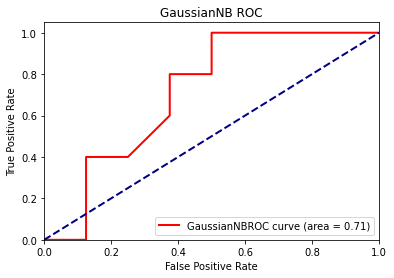

predict  0  1
label        
0        6  2
1        1  4
LogReg's accuracy : 0.769231
LogReg: 0.709091 (+/- 0.157144)
LogReg ok 


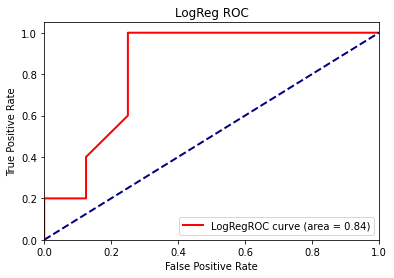

predict  0  1
label        
0        5  3
1        1  4
DecisionTreeClassifier's accuracy : 0.692308
DecisionTreeClassifier: 0.725455 (+/- 0.074168)
DecisionTreeClassifier ok 


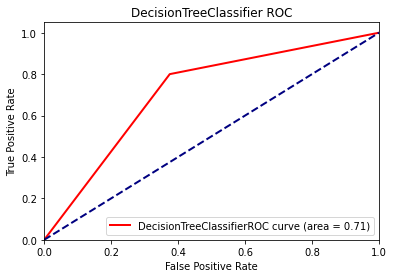

predict  0  1
label        
0        6  2
1        1  4
RandomForestClassifier's accuracy : 0.769231
RandomForestClassifier: 0.687273 (+/- 0.112463)
RandomForestClassifier ok 


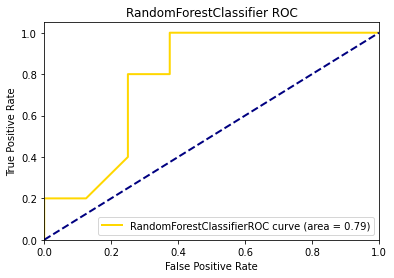

predict  0  1
label        
0        5  3
1        2  3
ExtraTreesClassifier's accuracy : 0.615385
ExtraTreesClassifier: 0.689091 (+/- 0.081596)
ExtraTreesClassifier ok 


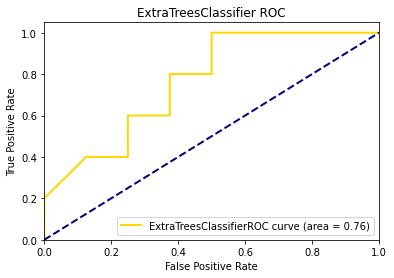

In [11]:
for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state = seed, shuffle = False)
    cv_results = cross_val_score(model, X_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)
    modelp = model.fit(X_train, y_train)
    if name == 'GaussianNB':
        #GaussianNBimportances = model.named_steps['GaussianNB'].coef_
        y_score=modelp.predict_proba(X_test)[:,1]
        clr='Red'
    if name == 'LogReg':
        LogRegimportances = model.named_steps['LogReg'].coef_
        y_score=modelp.decision_function(X_test)
        clr='Red'
        #joblib.dump(modelp, "LogReg.sav")
    if name == 'DecisionTreeClassifier':
        DecisionTreesimportances = model.named_steps['DecisionTrees'].feature_importances_
        y_score=modelp.predict_proba(X_test)[:,1]
        #joblib.dump(modelp, "DecisionTree.sav")
    if name == 'RandomForestClassifier':
        RandomForestimportances = model.named_steps['RandomForest'].feature_importances_
        y_score=modelp.predict_proba(X_test)[:,1]
        clr='Gold'
    if name == 'ExtraTreesClassifier':
        ExtraTreesimportances = model.named_steps['ExtraTrees'].feature_importances_
        y_score=modelp.predict_proba(X_test)[:,1]
        
#    if name == 'XGBClassifier':
#        XGBimportances = model.named_steps['XGB'].feature_importances_
#        y_score=modelp.predict_proba(X_test)[:,1]
#    if name == 'KNN':
#        y_score=modelp.predict_proba(X_test)[:,1]
#        clr='Green'
#    if name == 'GradientBoostingClassifier':
#        GradientBoostingimportances = model.named_steps['GradientBoosting'].feature_importances_
#        y_score=modelp.decision_function(X_test)
#        clr='yellow'
#    if name == 'RidgeClassifier':
#        y_score=modelp.decision_function(X_test)
#    if name == 'BaggingRidgeClassifier':
#        y_score=modelp.predict_proba(X_test)[:,1]

    y_preds=modelp.predict(X_test)
    accuracyL.append(accuracy_score(y_test, y_preds))
    
    f1L.append(f1_score(y_test, y_preds, average='binary'))
    precisionL.append(precision_score(y_test, y_preds, average='binary'))
    recallL.append(recall_score(y_test, y_preds, average='binary'))
    
    #f1L.append(f1_score(y_test, y_preds,average='weighted'))
    #precisionL.append(precision_score(y_test, y_preds,average='weighted'))
    #recallL.append(recall_score(y_test, y_preds,average='weighted'))
    
    #joblib.dump(modelp, 'DET'+ name +'.model')
    #print(name)
    print(pd.crosstab(y_test, y_preds,rownames=['label'],colnames=['predict']))
    
    print("%s's %s : %.6f"% (name, "accuracy", accuracy_score(y_test, y_preds)))
    
    #csvdata=np.column_stack((np.array(df_test.PassengerId),y_preds)) 
    #np.savetxt(name+".csv", csvdata, delimiter=",",fmt='%d'\
    #           ,header ='PassengerId,Survived',comments='')
    names.append(name)
    modelname.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    msgL.append(msg)
    print(msg)
    print("{0} {1} ".format(name,"ok"))
    
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    ##############################################################################
    # Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color=clr, lw=lw, 
             label = name + 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name+' ROC')
    plt.legend(loc="lower right")
    plt.show()
    #fig_name = "2.after normalization - " + str(name) + ".png"
    #plt.savefig(fig_name)
    #print(y_score)
    #print("\n")

[Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'LogReg'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'ExtraTreesClassifier')]

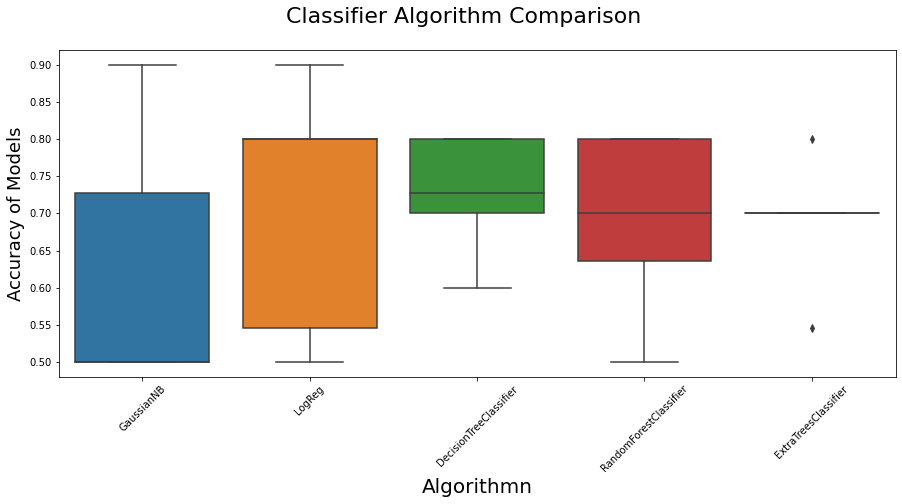

In [12]:
importancesname = ['feature','LogReg', 'DecisionTrees', 'RandomForest', 'ExtraTrees']
#importancesname=['feature','LogReg','RandomForest','GradientBoosting']

importances = [importancesname, LogRegimportances.flatten(), DecisionTreesimportances, 
               RandomForestimportances, ExtraTreesimportances]
#importances=[importancesname,LogRegimportances.flatten(),RandomForestimportances,GradientBoostingimportances]

report = [modelname,accuracyL, f1L, precisionL, recallL] 
import csv
with open('report.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(report)
with open('importances.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(importances)
  
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize = 22)
ax = fig.add_subplot(111)
sns.boxplot(x = names, y = results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize = 20)
ax.set_ylabel("Accuracy of Models", fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

#plt.savefig("2.after normalization - Classifier Algorithm Comparison.png")

## 驗證模型

In [13]:
from joblib import dump, load
#創造另外的測試集，驗證做好的 model
tree_health = dt_health.sample(n = 16, random_state = 8)
tree_stroke = stroke.sample(n=16, random_state = 8)

df_tree = pd.concat([tree_health, tree_stroke], axis = 0)
drop = ['pid', 'yr', 'psick11']
xx_test = df_tree.drop(drop, axis = 1)

yy_test = np.array(df_tree['psick11'], dtype = int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
predict   0
label      
0        16
1        16
LogReg's accuracy : 0.5
LogReg: 0.809524 (+/- 0.127775)


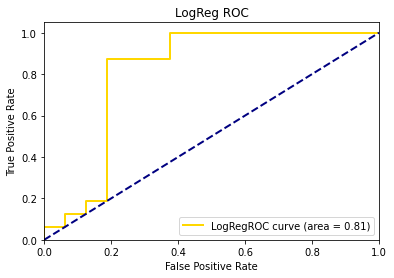

In [14]:
#讀取LogReg 的 Model
Log_model = joblib.load("LogReg.sav")

#印出結果
L_result = Log_model.predict(xx_test[:])
yy_Lscore = Log_model.predict_proba(xx_test)[:,1]
yy_Lpreds = Log_model.predict(xx_test)
L_acc = accuracy_score(yy_test, yy_Lpreds)
L_msg = cross_val_score(Log_model, xx_test, yy_test, cv= 5, scoring=scoring, n_jobs=-1)

print(L_result)
print(pd.crosstab(yy_test, yy_Lpreds, rownames = ['label'], colnames = ['predict']))
print("{0}'s accuracy : {1}".format("LogReg", L_acc))
print("%s: %f (+/- %f)" % ("LogReg", L_msg.mean(),  L_msg.std()))
    
    ##############################################################################
# Plot of a ROC curve for a specific class
L_fpr, L_tpr, _ = roc_curve(yy_test.ravel(), yy_Lscore.ravel())
L_roc_auc = auc(L_fpr, L_tpr)
plt.figure()
lw = 2
plt.plot(L_fpr, L_tpr, color=clr, lw=lw,
         label = "LogReg" + 'ROC curve (area = %0.2f)' % L_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LogReg" + ' ROC')
plt.legend(loc = "lower right")
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
predict   0
label      
0        16
1        16
DecisionTree's accuracy : 0.5
LogReg: 0.938095 (+/- 0.076190)


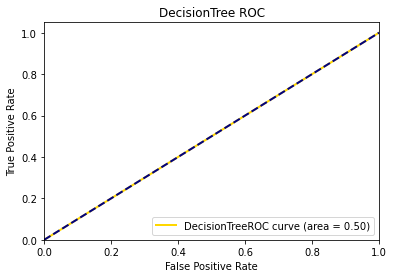

In [15]:
#讀取DecisionTree 的 Model
Decision_model = joblib.load("DecisionTree.sav")

#印出結果
Dec_result = Decision_model.predict(xx_test[:])
yy_Dec_score = Decision_model.predict_proba(xx_test)[:,1]
yy_Dec_preds = Decision_model.predict(xx_test)
Dec_acc = accuracy_score(yy_test, yy_Dec_preds)
Dec_msg = cross_val_score(Decision_model, xx_test, yy_test, cv= 5, scoring=scoring, n_jobs=-1)

print(Dec_result)
print(pd.crosstab(yy_test, yy_Dec_preds, rownames = ['label'], colnames = ['predict']))
print("{0}'s accuracy : {1}".format("DecisionTree", Dec_acc))
print("%s: %f (+/- %f)" % ("LogReg", Dec_msg.mean(),  Dec_msg.std()))

    ##############################################################################
# Plot of a ROC curve for a specific class
Dec_fpr, Dec_tpr, _ = roc_curve(yy_test.ravel(), yy_Dec_score.ravel())
Dec_roc_auc = auc(Dec_fpr, Dec_tpr)
plt.figure()
lw = 2
plt.plot(Dec_fpr, Dec_tpr, color=clr, lw=lw,
         label = "DecisionTree" + 'ROC curve (area = %0.2f)' % Dec_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("DecisionTree" + ' ROC')
plt.legend(loc = "lower right")
plt.show()